<a href="https://colab.research.google.com/github/jatabhishekchaudhary1222-create/AQI-prediction/blob/main/AQI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA COLLECTION

In [ ]:
import kagglehub
path = kagglehub.dataset_download("rohanrao/air-quality-data-in-india")

Using Colab cache for faster access to the 'air-quality-data-in-india' dataset.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dt = pd.read_csv("/kaggle/input/air-quality-data-in-india/city_day.csv")

In [ ]:
dt

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


DATA PREPROCESSING

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
dt = dt.drop_duplicates()

In [ ]:
dt = dt.dropna()

In [ ]:
dt_sum=dt.isnull().sum

DATA NORMALISATION

In [ ]:
from inspect import Parameter
import scipy.stats as stats
dt['age'],Parameter = stats.boxcox(dt['PM2.5'])

<Axes: xlabel='O3', ylabel='Density'>

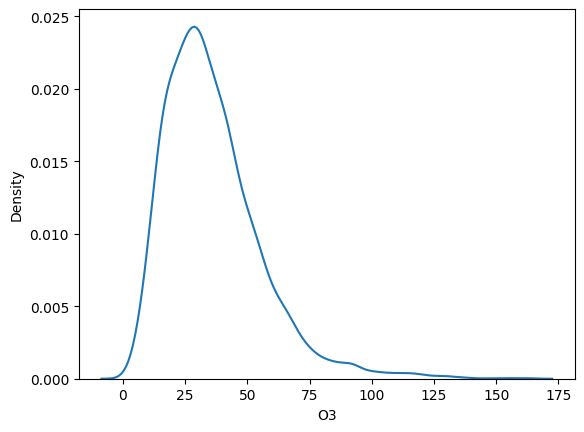

In [ ]:
sns.kdeplot(dt['O3'])

<Axes: xlabel='SO2', ylabel='Density'>

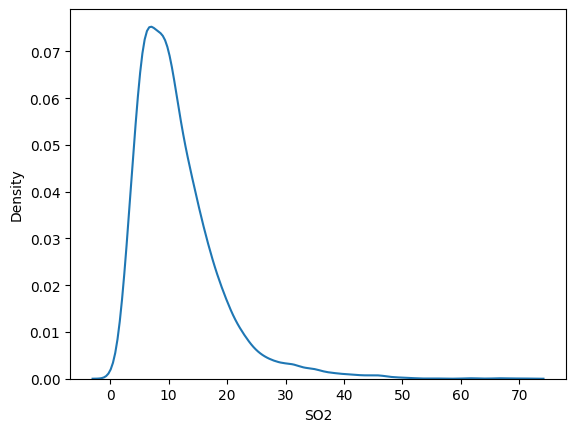

In [ ]:
sns.kdeplot(dt['SO2'])

In [ ]:
X=dt.drop('O3',axis=1)
Y=dt['O3']

TRAIN TO SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Benzene,Toluene,Xylene,AQI,AQI_Bucket,age
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,0.20,6.50,0.06,184.0,Moderate,4.372379
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,0.22,7.95,0.08,197.0,Moderate,4.334277
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,0.29,7.63,0.12,198.0,Moderate,4.457869
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,0.17,5.02,0.07,188.0,Moderate,4.137528
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,0.21,4.71,0.08,173.0,Moderate,4.257581


MODEL TRAINING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dt['City'] = le.fit_transform(dt['City'])

# Now your 'Amritsar' entry is a number, and .fit() will work!

In [ ]:
Y = LabelEncoder()
dt['Date'] = le.fit_transform(dt['Date'])


In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Identify all text (object) columns in your dataframe 'dt'
categorical_cols = dt.select_dtypes(include=['object']).columns

# 2. Encode EVERY text column automatically
le = LabelEncoder()
for col in categorical_cols:
    dt[col] = le.fit_transform(dt[col])

# 3. NOW define your X and Y (this ensures X contains the new numbers)
# Replace 'Target_AQI' with the name of your target/label column
X = dt.drop('AQI', axis=1)
Y = dt['AQI']

# 4. Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 5. NOW the fit will work!
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [52]:
dt_rf=RandomForestClassifier
dt_rf.fit(X_train,Y_train)

RandomForestClassifier()

In [53]:
print("Model trained successfully!")

Model trained successfully!


MODEL PREDICTION

In [57]:
dt_clf_pred=dt_clf.predict(X_test)
dt_clf_acc = accuracy_score(Y_test,dt_clf_pred)
print(dt_clf_acc)

0.03685897435897436


MODEL SAVING

In [55]:
import pickle
m_d='dt_aqi_model.pkl'
with open(m_d,'wb') as file:
  pickle.dump(dt_clf,file)
print('Model saved succesfully')

Model saved succesfully
